This notebook shows an example how this package can be used to perform feature reduction on the **Boston Housing** dataset.

### Import necessary packages

In [1]:
import pandas as pd
import numpy as np
from multicollinearity.feature_reduction import MultiCollinearity

### Read data

In [2]:
df = pd.read_csv('../data/HousingData.csv.gz')
df.shape

(506, 14)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Let's assume that MEDV is the target variable.

In [4]:
target = 'MEDV'

Now this particular dataset doesn't have huge multicollinearity issue, so let's introduce a little anarchy, I mean... multicollinearity, in this data. We will add an extraneous feature called `EXTRA`.

In [5]:
df['EXTRA'] = (.01 * df['RAD']) + (.02 * df['ZN']) - (.003 * df['CRIM']) + np.random.uniform()

### **Step 1:** Initialize the `Multicollinearity` class.

In [6]:
mc = MultiCollinearity(df, target, corr_plot=True, verbose=True)

### **Step 2:** Perform feature reduction based on the pairwise correlations. 

Although it's not necessary, we can reduce some features based on pairwise correlations before running the multi-collinearity-based feature reduction step

INFO: Discarded 0 rows with missing values
INFO: Discarded 0 columns with constant values
INFO: Discarded 0 categorical columns
INFO: Input number of features: 14


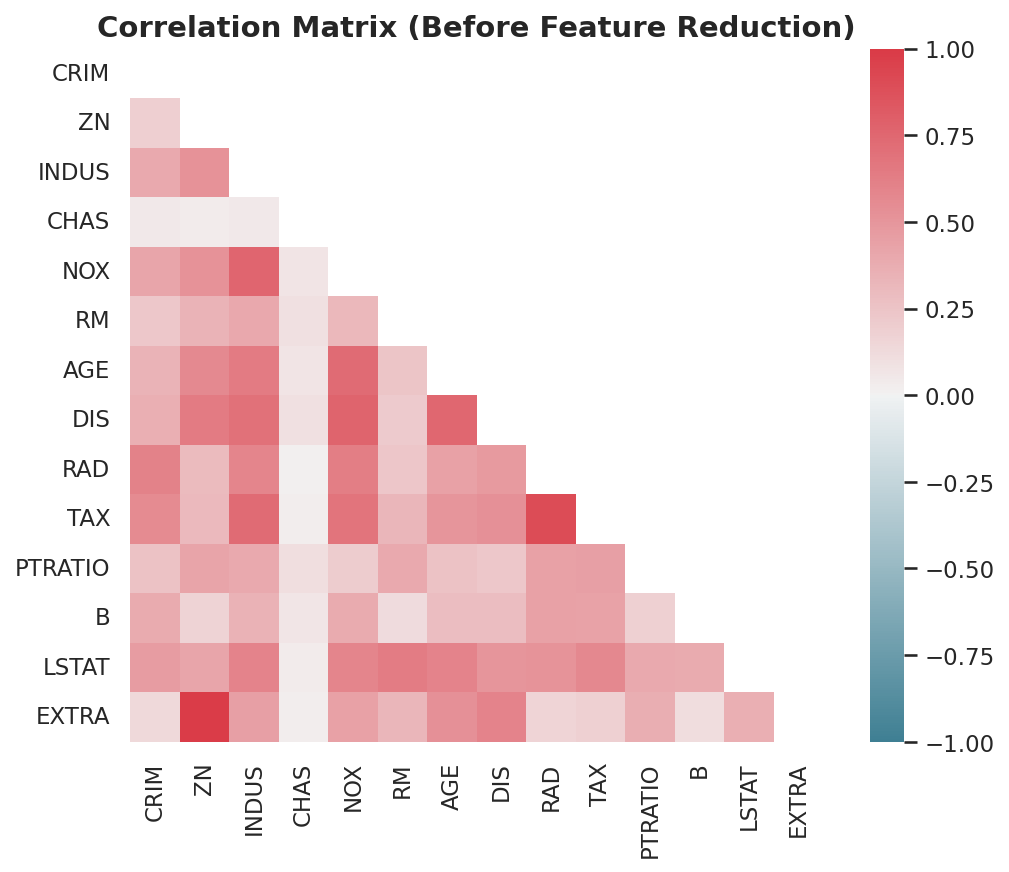

DROP: EXTRA	[Highly correlated with ZN (0.99)]
DROP: RAD	[Highly correlated with TAX (0.90)]
STOP: The max pairwise correlation (0.77) is below threshold (0.80)


In [7]:
df_temp = mc.pairwise_corr()

The pairwise correlation based feature reduction step removed two features.

### **Step 3:** The final feature reduction step, using multi-collinearity.

Please note that for demonstration purposes ONLY, we will use a very low value for the condition index threshold. (The default value is 30.)

DROP: TAX [It leans the most on the eigen vector with the lowest eigen value (0.16)]
DROP: ZN [It leans the most on the eigen vector with the lowest eigen value (0.18)]
DROP: AGE [It leans the most on the eigen vector with the lowest eigen value (0.18)]
DROP: RM [It leans the most on the eigen vector with the lowest eigen value (0.19)]
DROP: NOX [It leans the most on the eigen vector with the lowest eigen value (0.19)]
STOP: The condition index (3.35) is below threshold (4.00)


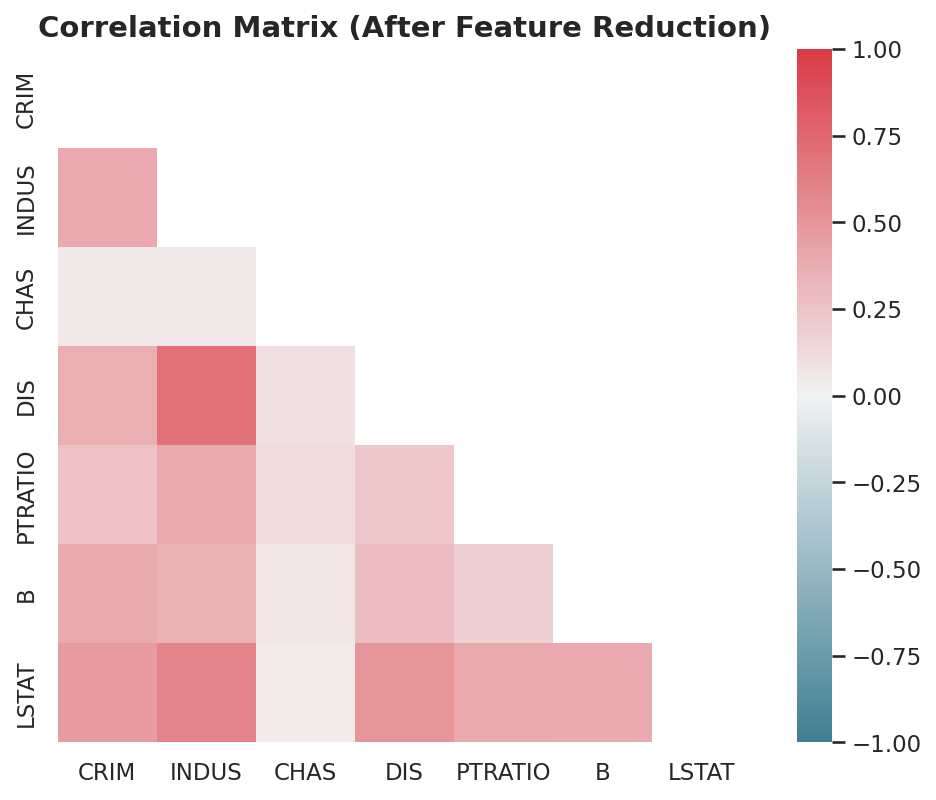

In [8]:
df_slim = mc.multi_collin(cond_index_tol=4)

In [9]:
len(df_slim.columns)

8

After the two steps of feature reduction process, we have 8 features left.